In [42]:
import os
import copy

import numpy as np
import matplotlib.pyplot as plt

from General.Analysis import Analyzer
from General.Data_handling import import_hdf5, drive_letter, InterpolationSet
from General.Data_handling.Import import DataSet, SimpleDataSet

dependent = 'pH'
variable_name = 'pH'
variable_factor = 1
wavelength_range = [180, 450]
r2_values = [0.99, 1]
wavelength_plot_every = 5
plot_measurement_num = 3
baseline_correction = [450, 500]

image_loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Plots\Calibration\H2O2 pH'
loc1 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\H2O2 pH\data.hdf5'
dat1 = import_hdf5(loc1, dependent)
analyzer1 = Analyzer.from_DataSet(DataSet.from_simple(dat1, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')
loc2 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\H2O2 pH 2\data.hdf5'
dat2 = import_hdf5(loc2, dependent)
analyzer2 = Analyzer.from_DataSet(DataSet.from_simple(dat2, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')

loc3 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\HCl pH\data.hdf5'
data_hcl = import_hdf5(loc3, dependent)
interp_hcl = InterpolationSet.from_simple(data_hcl, False)

dat3 = copy.deepcopy(dat2)
for var in np.unique(dat3.variable):
    if var > 2.37:
        continue
    mask = dat3.variable == var
    dat3.absorbances[mask] = dat3.absorbances[mask] - interp_hcl.closest(var)
analyzer3 = Analyzer.from_DataSet(DataSet.from_simple(dat3, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')

loc4 = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration\H2O2 cuvette\data.hdf5'
data_H2O2 = import_hdf5(loc4, 'H2O2')
interp_H2O2 = InterpolationSet.from_simple(data_H2O2[data_H2O2.measurement_num==3], False)
data = interp_H2O2.interpolate(1e-3)
dat4 = SimpleDataSet(analyzer3.wavelength, data[None, :], np.array([3]), np.array([3]), variable_name) + dat1
analyzer4 = Analyzer.from_DataSet(DataSet.from_simple(dat4, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')

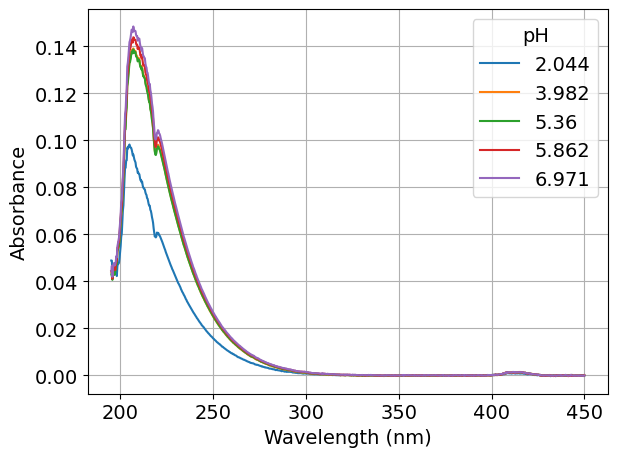

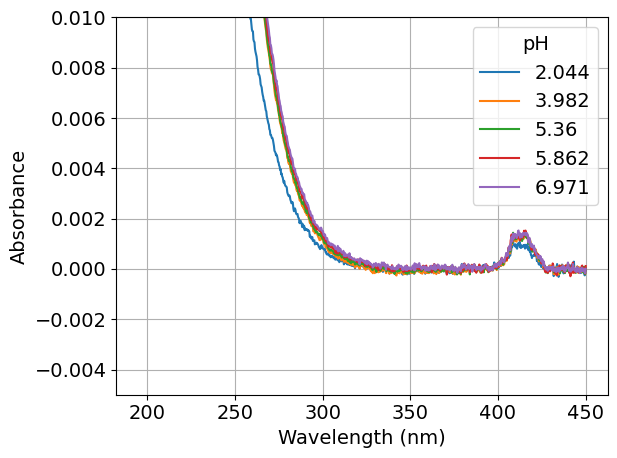

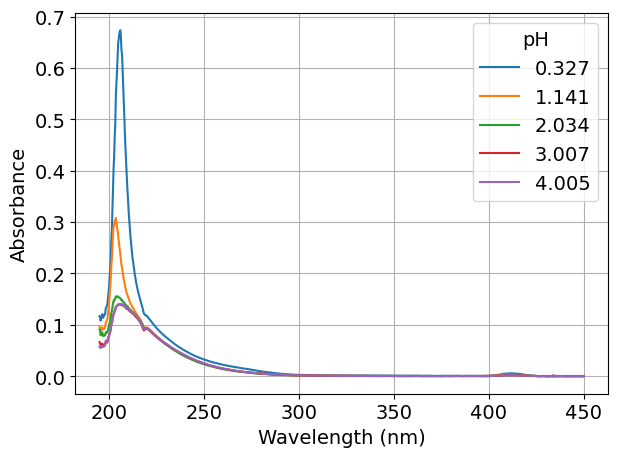

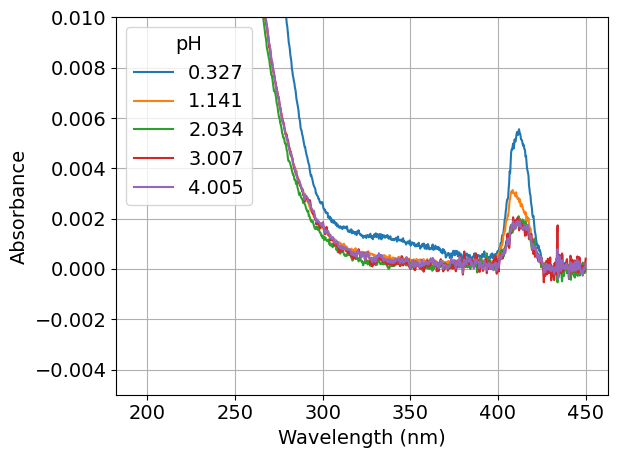

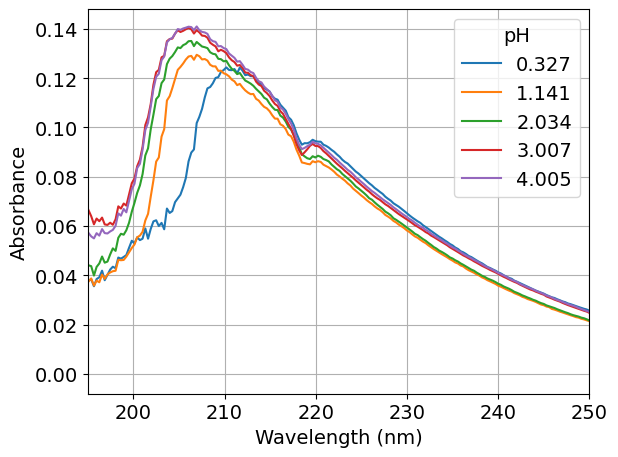

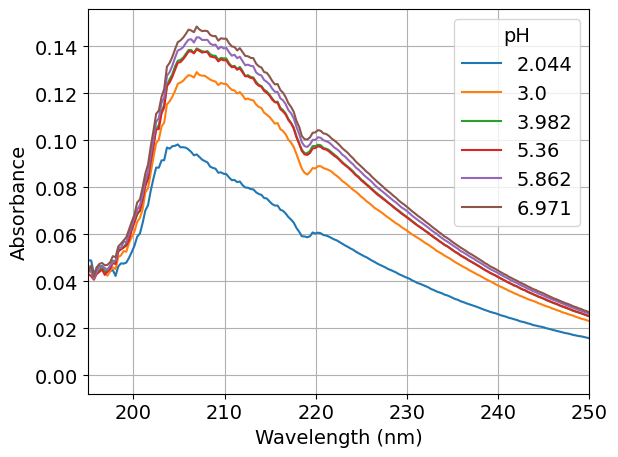

In [44]:
analyzer1.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' first measurement')
plt.show()
analyzer1.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' first measurement zoom', plot_kwargs={'ylim': [-0.005, 0.01]})
plt.show()

analyzer2.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' second measurement')
plt.show()

analyzer2.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' second measurement zoom', plot_kwargs={'ylim': [-0.005, 0.01]})
plt.show()

# Analyzer.from_DataSet(DataSet.from_simple(dat1 + dat2, [190, 450], 3, [350, 400]), 1, 'pH', 'jet').absorbance_vs_wavelength_with_variable(
#     save_loc=image_loc, save_suffix=' combined'
# )
# plt.show()
# 
# Analyzer.from_DataSet(DataSet.from_simple(dat1 + dat2, [190, 450], 3, [350, 400]), 1, 'pH', 'jet').absorbance_vs_wavelength_with_variable(
#     plot_kwargs={'xlim': [195, 250], 'ylim': [0, 0.2]}, save_loc=image_loc, save_suffix=' combined zoom'
# )
# plt.show()
# 
# Analyzer.from_DataSet(DataSet.from_simple(dat1 + dat2, [190, 450], 3, [350, 400]), 1, 'pH', 'jet').absorbance_vs_wavelength_with_variable(
#     corrected=False, plot_kwargs={'ylim': [-0.005, 0.01]}, save_loc=image_loc, save_suffix=' combined zoom uncorr'
# )
# plt.show()

analyzer3.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' second measurement HCl corrected', plot_kwargs={'xlim': [195, 250]})
plt.show()

analyzer4.absorbance_vs_wavelength_with_variable(save_loc=image_loc, save_suffix=' first measurement plus pH3', plot_kwargs={'xlim': [195, 250]})
plt.show()